First we start by loading the libraries, creating the graph, data, variables, and
placeholders. There is an additional part to this section that is very important. After
we create the data, we will split the data into training and testing datasets randomly.
This is important because we will always test our models if they are predicting well
or not. Evaluating the model both on the training data and test data also lets us see
whether the model is overfitting or not:

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# creamos los datos
batchsize=20
x_data=np.random.normal(1,0.1,10000)
y_data=np.repeat(10,10000)

# Creación de training and testing data

train_indices = np.random.choice(len(x_data), round(len(x_data)*0.8), replace=False)

# set se usa para crear dos conjunts de numeros y asi poder restarlos para obtener la diferencia y asignarla a test_index
test_indices = np.array(list(set(range(len(x_data))) - set(train_indices)))

train_data=x_data[train_indices]
validation_data=x_data[test_indices]

train_label=y_data[train_indices]
validation_label=y_data[test_indices]

# Creamos placeholder

x_ph=tf.placeholder(tf.float32,shape=[None,1])
y_target=tf.placeholder(tf.float32,shape=[None,1])

## Creamos variables

weight=tf.Variable(tf.random_normal(mean=1. ,shape=[1,1]))
bias=tf.Variable(tf.random_normal(mean=1,shape=[1]))

## creamos salida

y_output=tf.matmul(x_ph,weight)

# Creamos funcion de perdidad y optimizador

mse= tf.reduce_mean(tf.square(y_output-y_target))
optimizer=tf.train.GradientDescentOptimizer(0.02).minimize(mse)

## creación de session

sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)

loss_train=[]
loss_validation=[]

for i in range(300):
    rand_int_train=np.random.choice(len(train_data),batchsize)
    rand_int_val=np.random.choice(len(validation_data),batchsize)
    #creación batches training
    rand_train_input=np.transpose([train_data[rand_int_train]])
    rand_train_label=np.transpose([train_label[rand_int_train]])
    #creación batches validation
    rand_test_input=np.transpose([validation_data[rand_int_val]])
    rand_test_label=np.transpose([validation_label[rand_int_val]])
    
    sess.run(optimizer, feed_dict={x_ph:rand_train_input,y_target:rand_train_label})
    
    loss_train_batch=sess.run(mse, feed_dict={x_ph:rand_train_input, y_target:rand_train_label})
    loss_train.append(loss_train_batch)
    
    loss_validation_batch=sess.run(mse, feed_dict={x_ph:rand_test_input,y_target:rand_test_label})
    loss_validation.append(loss_validation_batch)
    
    print('loss_train', loss_train_batch)
    print('loss_validation', loss_validation_batch)
    
    
sess.close()



loss_train 62.7817
loss_validation 61.9856
loss_train 57.7253
loss_validation 58.4861
loss_train 53.5011
loss_validation 54.09
loss_train 49.1536
loss_validation 48.9287
loss_train 45.1944
loss_validation 45.8992
loss_train 41.211
loss_validation 42.7526
loss_train 38.0699
loss_validation 38.6352
loss_train 36.1837
loss_validation 36.0155
loss_train 33.3546
loss_validation 33.1683
loss_train 30.7818
loss_validation 32.4149
loss_train 28.0321
loss_validation 28.5378
loss_train 25.8086
loss_validation 26.7514
loss_train 22.9094
loss_validation 24.9909
loss_train 20.7788
loss_validation 22.5735
loss_train 22.6866
loss_validation 21.6513
loss_train 17.7022
loss_validation 18.4246
loss_train 17.7068
loss_validation 17.574
loss_train 16.6795
loss_validation 17.0598
loss_train 15.0241
loss_validation 15.8036
loss_train 14.1302
loss_validation 14.1012
loss_train 12.1302
loss_validation 13.2216
loss_train 12.3751
loss_validation 11.9946
loss_train 12.6309
loss_validation 10.2954
loss_train 11.8

In [7]:
train_indices = np.random.choice(len(x_data), round(len(x_data)*0.8), replace=False)
#test_indices = np.array(list(set(range(len(x_data))) - set(train_indices)))

len(x_data)
len(train_indices)

8000

c:\users\probook\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


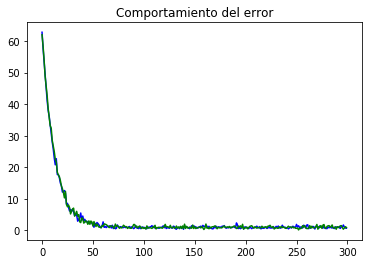

In [8]:
bins = np.linspace(-5, 5, 50)
plt.plot(loss_train,'blue')
plt.plot(loss_validation,'green')
plt.legend(loc='upper right')
plt.title('Comportamiento del error')
plt.show()

In [23]:
x_vals = np.linspace(0, 10, 100)
y_vals = x_vals + np.random.normal(0, 1, 100)
type(y_vals)
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))

ones_column.shape


(100, 1)

In [27]:
np.column_stack?